In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# import math

from datetime import datetime
# import random
# import time
# import os
# import requests
# import pickle
# import json
# import re

pd.set_option('display.max_columns', None)
path = 'data/'

datetime.now()

datetime.datetime(2024, 3, 2, 20, 54, 25, 275421)

In [2]:
df = pd.read_excel(path + 'Base_Carry_Trade.xlsx')
df.shape

(4514, 9)

In [3]:
df

,Date,CCL,MEP,CER,BM,Vol_CCL,CER_MEP,CER_CCL,bal_comer
0,2006-08-02,3.053173,NaN,1.8244,6.631084e+04,NaN,NaN,0.597542,966.100786
1,2006-08-03,3.041958,NaN,1.8247,6.699560e+04,NaN,NaN,0.599844,966.990262
2,2006-08-04,3.050260,NaN,1.8250,6.703649e+04,NaN,NaN,0.598310,967.663563
3,2006-08-07,3.032929,NaN,1.8259,6.729551e+04,NaN,NaN,0.602025,968.337771
4,2006-08-08,3.027211,NaN,1.8263,6.699690e+04,NaN,NaN,0.603295,968.097729
...,...,...,...,...,...,...,...,...,...
4509,2024-02-22,1093.197250,1044.531762,257.3978,1.034542e+07,3030757.66,0.246424,0.235454,NaN
4510,2024-02-23,1108.461636,1070.015559,259.0657,1.034691e+07,382566.96,0.242114,0.233716,NaN
4511,2024-02-26,1094.511901,1046.316964,264.1345,NaN,1074921.00,0.252442,0.241326,NaN
4512,2024-02-27,1089.066079,1054.022989,265.8461,NaN,789779.26,0.252220,0.244105,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4514 entries, 0 to 4513
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4514 non-null   datetime64[ns]
 1   CCL        4514 non-null   float64       
 2   MEP        2483 non-null   float64       
 3   CER        4514 non-null   float64       
 4   BM         4511 non-null   float64       
 5   Vol_CCL    842 non-null    float64       
 6   CER_MEP    2483 non-null   float64       
 7   CER_CCL    4514 non-null   float64       
 8   bal_comer  4474 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 317.5 KB


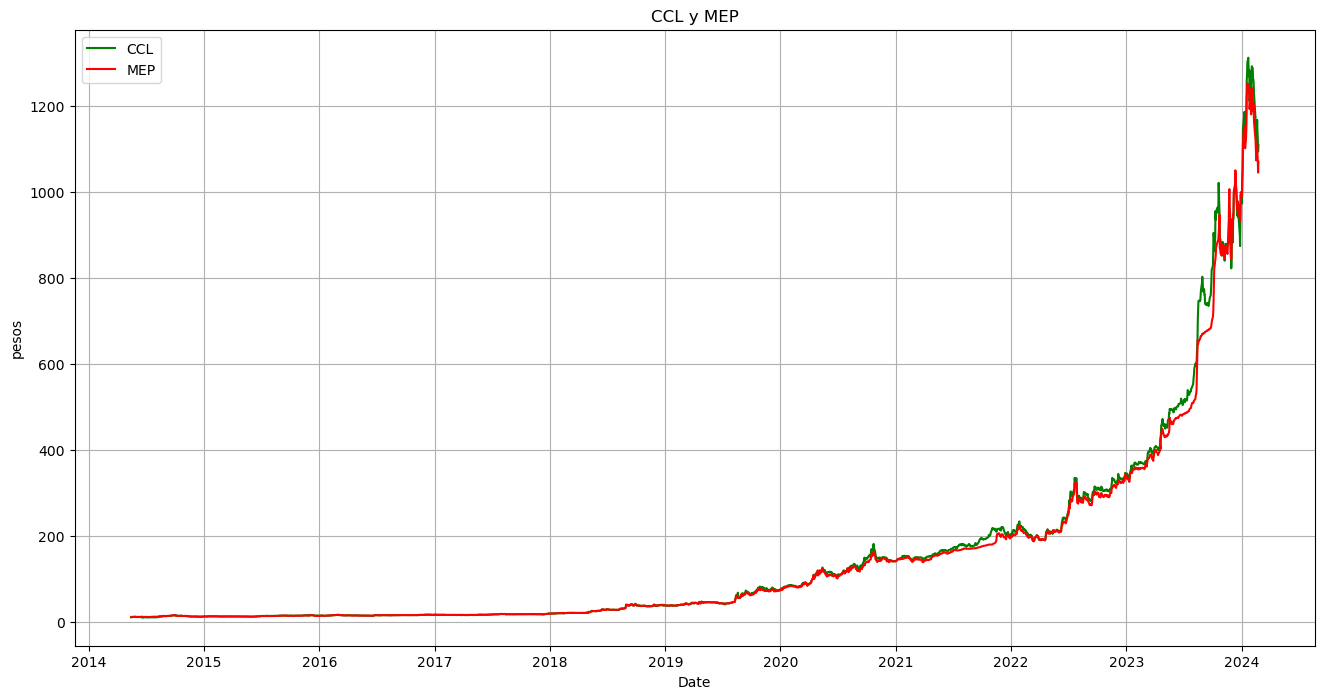

In [5]:
# Visualizar los resultados
my_cols = ['Date', 'CCL', 'MEP', 'BM']
df_plot = df[my_cols].set_index('Date').dropna().copy()

plt.figure(figsize=(16, 8))
# plt.plot(df_plot.index, df_plot['mass'], label='mass', color='blue')
plt.plot(df_plot.index, df_plot['CCL'], label='CCL', color='green')
plt.plot(df_plot.index, df_plot['MEP'], label='MEP', color='red')
plt.title('CCL y MEP')
plt.xlabel('Date')
plt.ylabel('pesos')
plt.legend()
plt.grid(True)
plt.show()

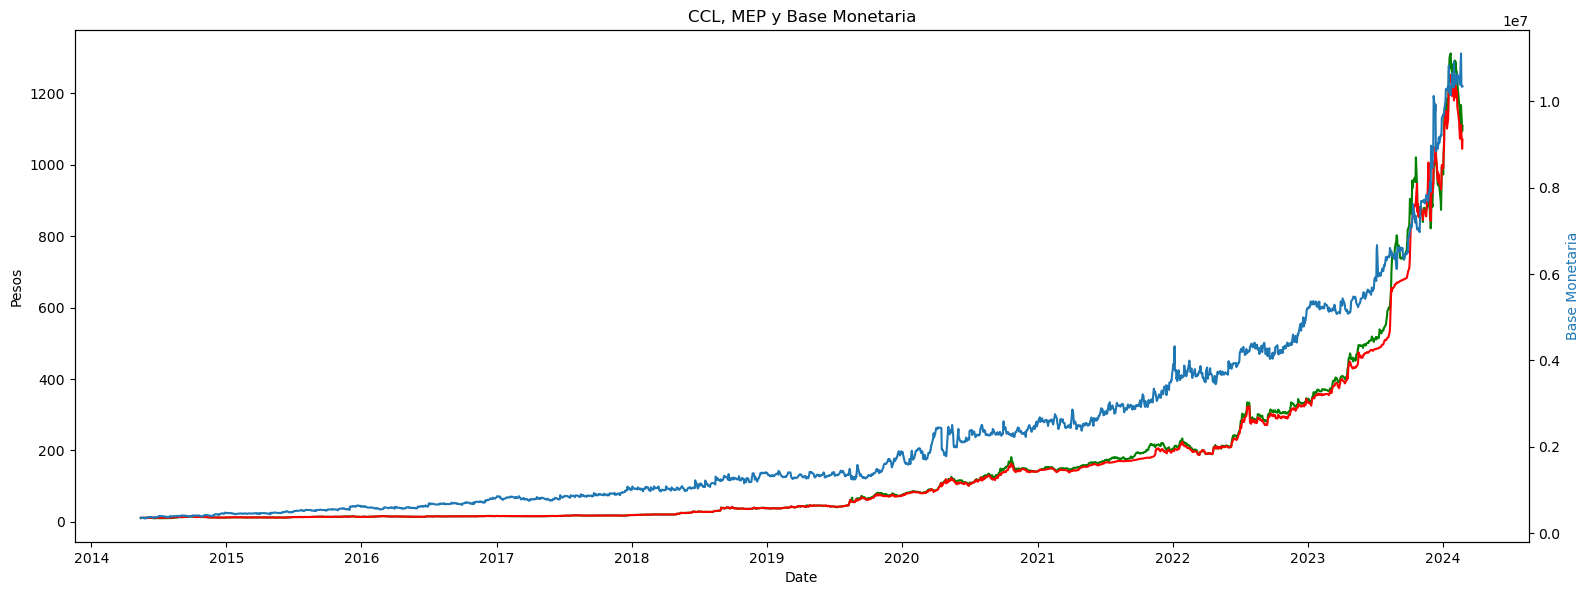

In [10]:
my_cols = ['Date', 'CCL', 'MEP', 'BM']
df_plot = df[my_cols].set_index('Date').dropna().copy()

fig, ax1 = plt.subplots(figsize=(16, 6))

color = 'tab:green'
ax1.set_xlabel('Date')
ax1.set_ylabel('Pesos')
plt.plot(df_plot.index, df_plot['CCL'], label='CCL', color='green')
plt.plot(df_plot.index, df_plot['MEP'], label='MEP', color='red')

# ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Base Monetaria', color=color)  
plt.plot(df_plot.index, df_plot['BM'], label='Base Monetaria', color=color)
# ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('CCL, MEP y Base Monetaria')
plt.show()

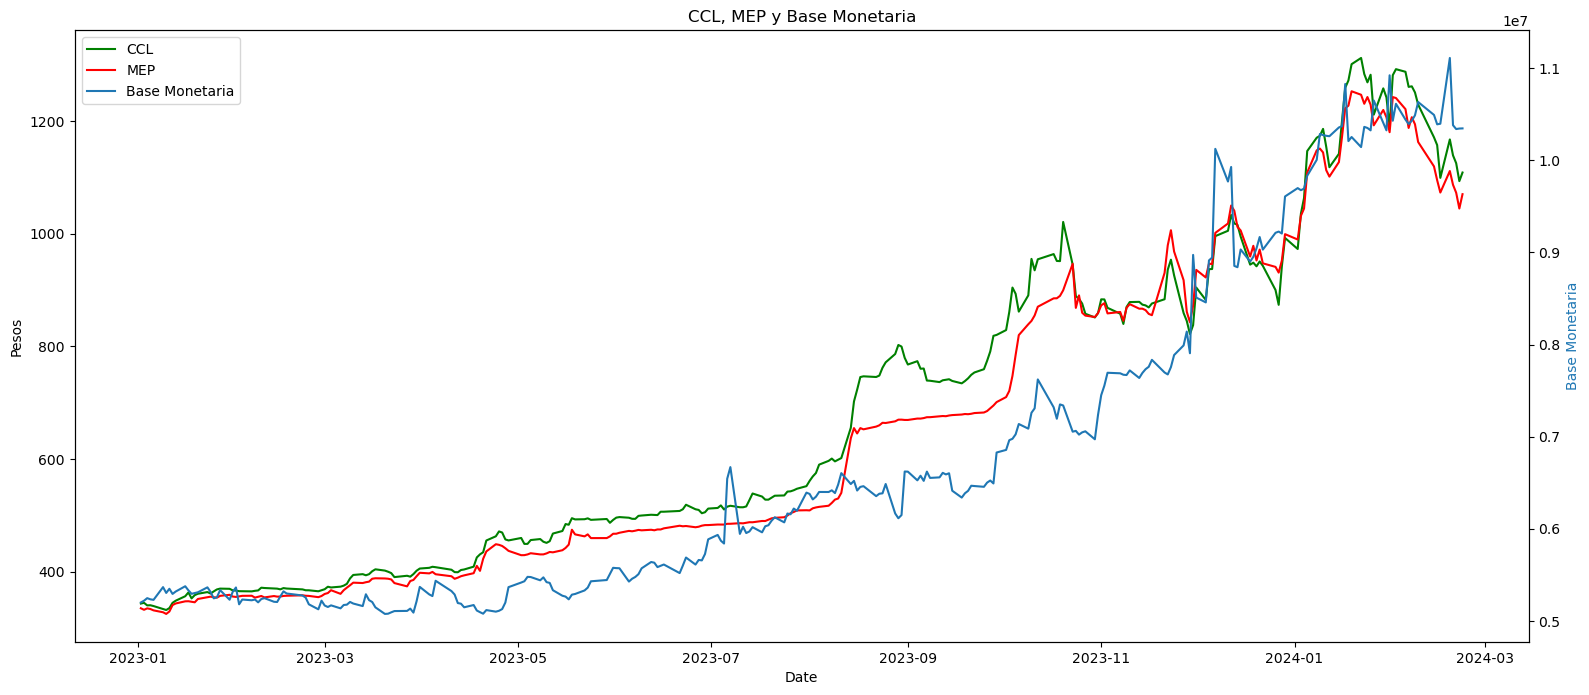

In [11]:
my_cols = ['Date', 'CCL', 'MEP', 'BM']
df_plot = df[df['Date']>='2023'][my_cols].set_index('Date').dropna().copy()

fig, ax1 = plt.subplots(figsize=(16, 7))

color = 'tab:green'
ax1.set_xlabel('Date')
ax1.set_ylabel('Pesos')
plt.plot(df_plot.index, df_plot['CCL'], label='CCL', color='green')
plt.plot(df_plot.index, df_plot['MEP'], label='MEP', color='red')
# ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Base Monetaria', color=color)  
plt.plot(df_plot.index, df_plot['BM'], label='Base Monetaria', color=color)
# ax2.tick_params(axis='y', labelcolor=color)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

fig.tight_layout()
plt.title('CCL, MEP y Base Monetaria')
plt.show()